# To Parse the given data file and represent the GC Content

## The requirements of the code , in case if Biological Data



The given Gene Transfer File has been used to analyse feature namely the GC content of the gene , the GC content as well as the GC ratio are calculated by analysing the FASTA file mentioned in the GTF as the " human genome (GRCh38), version 28 (Ensembl 92) " and the same fasta is required to be downloaded and parsed to analyse the Gene in question .


## Summary

The first part of the problem was to preprocess the data. Following were the steps used in order to preprocess the data -
1. Trying to convert the entire dataset into a dataframe to access the values accurately , iteratively as well as   quickly

2. Majority of the files had the input data in the form of category and sentence separated by feature followed by value followed by the delimiter . So as part of preprocessing I segregated the category using deques as well as dctionaries.

3. The files do not have any specific feature that allows us to access them genewise hence we need to create small df and visualise the genes seperately.  

4. There are many "transcripts" associated with a gene , I have chosen to represent all the transcripts , weather they are processed or not , but seperately .

5. Post the simple processing we calulate the GC content by counting occurances in the FASTA file accorging to the start & end positions specified and is plotted corresponding to the view of the gene created .

The functions can be run iteratively or specifically with little modification to create the features for desired number of genes or between a start and end position .

## Step 1 : Dependencies and libraries used 

Out of the ordinary we need the following libraries :
1. __gtfparse__ : parses the basic of the gtf file without splliting the attribute column of the file
2. __SeqIO__ : Required to read through the FASTA file
3. __dfv__ : For visual represenataion of the selected transcript 

In [557]:
import gtfparse 
from Bio import SeqIO
import numpy as np
import pandas as pd
from collections import deque
import time
import re
import matplotlib as plt
import matplotlib.pyplot as plt
import dna_features_viewer as dfv
from dna_features_viewer import GraphicFeature, GraphicRecord

# Proecssing the file

In [558]:
"""
Read the file into a databse 
"""
fn = 'gencode.v28.basic.annotation.gtf'
df = gtfparse.parse_gtf(fn)

df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr1,HAVANA,gene,11869,14409,NaN,+,0,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
1,chr1,HAVANA,transcript,11869,14409,NaN,+,0,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
2,chr1,HAVANA,exon,11869,12227,NaN,+,0,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
3,chr1,HAVANA,exon,12613,12721,NaN,+,0,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
4,chr1,HAVANA,exon,13221,14409,NaN,+,0,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."


 We observe that the attribute column is necessary to be able to access the elements genewise as well as to develop the dataset completely 

In [559]:
arr= df['attribute']
df2= pd.DataFrame()

start = time.time()
dictionary = {}

#features involved in attribute column ( from the rough notebook we can observe how we got the same)
#it is to increase the speed of the code that we secify this beforehand 
temp=["gene_id","gene_name","gene_type","havana_gene", "level","havana_transcript","tag", "transcript_id","transcript_name",
 "transcript_support_level","transcript_type","exon_id","exon_number","ont","protein_id","ccdsid"]

for each in temp:
    dictionary[each] = deque()

for i in xrange(0,len(arr)):
    #to know the lines parsed 
    if i % 100000 == 0:
        print(i)
    array = re.split(";\s|\s", arr[i])
    temp1 = list(temp)
    temp1.remove('tag')
    temp1.remove('ont')
    tag_list = deque()
    ont_list = deque()
    for i in xrange(0, len(array), 2):
        
        if array[i] not in temp1:
            pass
        else:
            temp1.remove(array[i])
        #'ont' and 'tag' have multiple values and need to be stored as exeption to the other fields with single values
        if array[i] == 'tag':
            tag_list.append(array[i+1].strip('"'))
            continue
        if array[i] == 'ont':
            ont_list.append(array[i+1].strip('"'))
            continue    
        dictionary[array[i]].append(array[i+1].strip('"'))
    dictionary['tag'].append(tag_list)
    dictionary['ont'].append(ont_list)
    
    for each in temp1:
        dictionary[each].append(None)
            
print(time.time() - start)
for key, value in dictionary.iteritems():
    #to ensure that we have the correct number of values and correctly ordered information
    print(key, len(value))

dictionary.pop("ont", None)
dictionary.pop("tag", None)
df2 = pd.DataFrame.from_dict(dictionary)

print "time taken:" + str((time.time()-start))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
135.37638092
('exon_number', 1684537)
('havana_gene', 1684537)
('transcript_support_level', 1684537)
('level', 1684537)
('transcript_type', 1684537)
('protein_id', 1684537)
('gene_id', 1684537)
('exon_id', 1684537)
('tag', 1684537)
('ont', 1684537)
('havana_transcript', 1684537)
('ccdsid', 1684537)
('transcript_id', 1684537)
('gene_type', 1684537)
('transcript_name', 1684537)
('gene_name', 1684537)
time taken:149.98606801


Now we create our final dat table


In [414]:
df=pd.concat([df,df2],axis=1)
df=df.drop(['attribute'],1)


The data has the following feaures finally 

In [415]:
list(df.columns)

['seqname',
 'source',
 'feature',
 'start',
 'end',
 'score',
 'strand',
 'frame',
 'ccdsid',
 'exon_id',
 'exon_number',
 'gene_id',
 'gene_name',
 'gene_type',
 'havana_gene',
 'havana_transcript',
 'level',
 'protein_id',
 'transcript_id',
 'transcript_name',
 'transcript_support_level',
 'transcript_type']

To study the completeness of the data we use missingno to visually represent the dataframe 

## Accessing the GC Content and the features of gene  

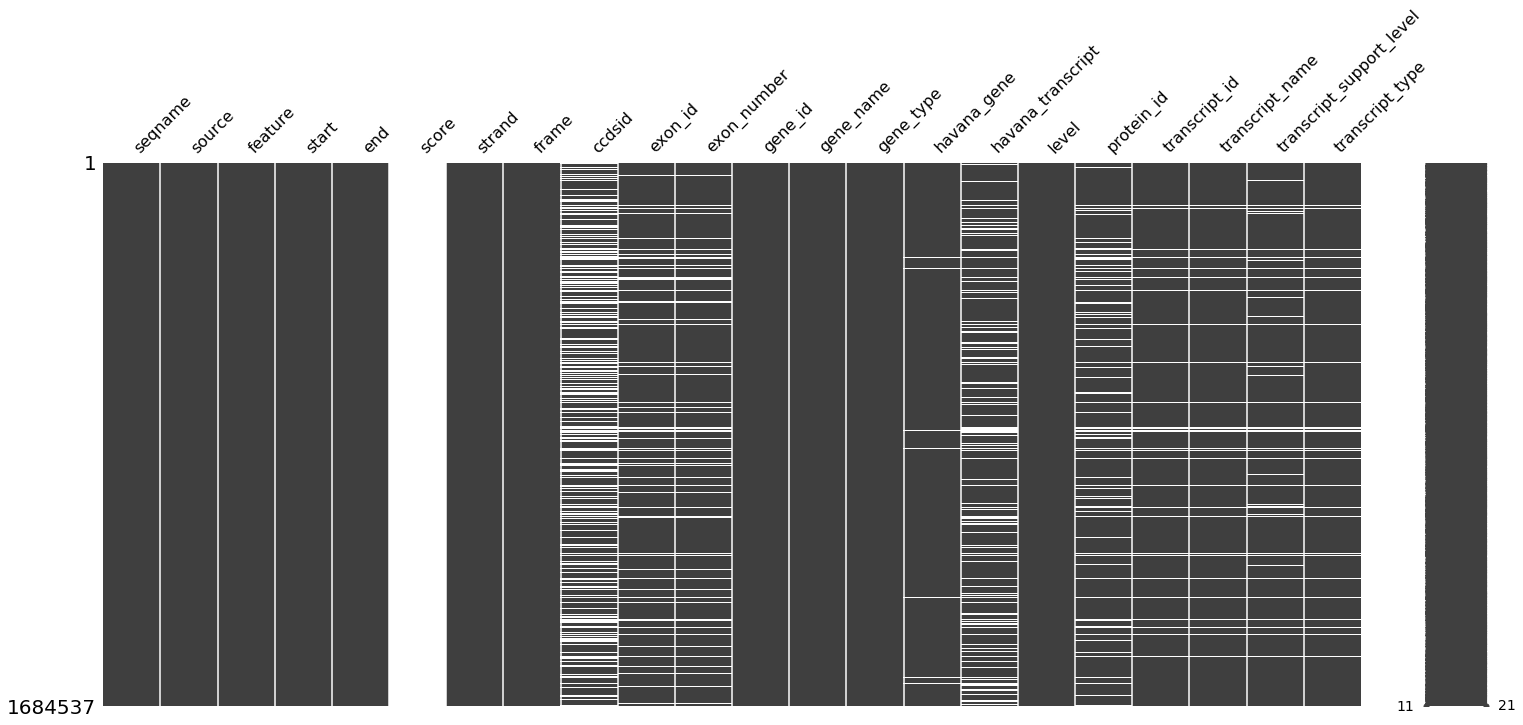

In [416]:
import missingno as mn

chr1=df

mn.matrix(chr1)
plt.show()

In [417]:
#score will be unused and is obsolete accoring to ensemble & ncbi
df=df.drop(['score'],1)

Here we now find the objects for our representaion or analysis i.e the Genes

In [565]:
names= chr1.gene_name.unique()
print "First five genes are :"+ str(names[:5])
print "Total number of genes " + str(len(names))

First five genes are :['DDX11L1' 'WASH7P' 'MIR6859-1' 'RP11-34P13.3' 'MIR1302-2']
Total number of genes 56832


In [585]:
def DNAView(df,Gene_Name,Transcript_Number):
    
    """
    The function is used to create visualisation of final solution. 
    
    Arguments - 
    1. df: The frame containing all the rows associated with the gene 
    2. Gene_Name: Name of Gene
    3. Transcript_Numver : The number of the transcrtpt ( each transctipt is for independent of gene)
    
    Return - empty: but provides a visualisation
    """
    
    v=[]
    k= []
    Label=[]
    GCContent=[]
    GCRatio=[]
    color={ "transcript": "#ffd700","exon":"#ffcccc","CDS":"#ccccff" ,"start_codon":"#af90ce","stop_codon":"#90adce" ,"UTR":"#404f60" ,"Selenocysteine":"#a8c8db"}
    for row in df.iterrows():
        index = row[0]
        if row[1]["strand"] =="+":
            v.append([row[1]["start"],row[1]["end"],+1,color[row[1]["feature"]],row[1]["feature"]])
        else:
            v.append([row[1]["start"],row[1]["end"],-1,color[row[1]["feature"]],row[1]["feature"]])
    
    for x in v:
        k.append(GraphicFeature(start=x[0], end=x[1], strand=x[2], color=x[3],label=x[4]))
        arr=GC_Content(x[0],x[1],x[2])
        Label.append(x[4])
        GCContent.append(arr[0])
        GCRatio.append(arr[1])
    mapped =map(color.get,Label)
    plt.bar( x=[i for i in range(0,len(mapped))], height=GCContent,color=mapped,tick_label=Label)
    plt.ylabel('GCContent')    
    record = GraphicRecord(sequence_length=v[0][1]-v[0][0]+550, features=k,first_index=v[0][0]-550)
    fig = record.plot()
    plt.title("GENE NAME :"+str(Gene_Name) + "\n" +"Transcript Version "+str(Transcript_Number+1))
    plt.show()


def GC_Content(start,stop,strand):
    
    """
    The function is used to iterate through all the lines in a text file. 
    The function skips through the line starting with # since they define
    the heading from which the code is taken. 
    
    Arguments - 
    1. start: start position in the FASTA file 
    2. stop: end position in the FASTA file 
    3. strand : +ve or -ve
    
    Return - tuple: with GC content & GC ratio
    """
    
    try:
        f = open('chr1.txt',"r")
        f.seek(start)
        seq = f.read(stop-start) 
        #print stop-start,seq

        if strand == "+":
            G = seq.count("G")
            C = seq.count("C")
            A = seq.count("A")
            T = seq.count("T")
            return float(G+C)/float(A+T+G+C),float(A+T)/float(G+C)
        else :
            #if strand is '-' we need to take the reverse compliment in 5'-3'
            seq_dict = {'A':'T','T':'A','G':'C','C':'G'}
            seq = "".join([seq_dict[base] for base in reversed(seq)])
            G = seq.count("G")
            C = seq.count("C")
            A = seq.count("A")
            T = seq.count("T")
            return float(G+C)/float(A+T+G+C),float(A+T)/float(G+C)
    except KeyError as err:
        print("Sequence stretch contains N strech only".format(err))
        return "N error"
    except ZeroDivisionError as err:
        print(str(stop-start)+'is the string length , too small to process'.format(err))
        return "String length"+str(stop-start)
        raise


In [586]:
def GeneFrame(i):
    """
    The function is used to segeregate transcripts as well as call for the other associated functions : 
    
    Arguments - 
    1. i: Position of the required gene in the full aray of gene names i.e 'names'
    """   
    gene = chr1.loc[chr1['gene_name']==names[i]]
    locs=[]
    t_location=[]
    t_toprocess=[]
    geneloc = gene.loc[gene['feature']=="gene"]
    transcripts = gene.loc[(gene['feature'] == "transcript")]
    for j in range(0,len(transcripts)):
        t=[int(gene.index[-1])]
        t_location = list(transcripts.index)
        t_location= t_location+t
        t_toprocess= [t_location[j],t_location[j+1]]
        pos= np.arange(t_location[j],t_location[j+1])
        frame = chr1.loc[pos]
        DNAView(frame,names[i],j)


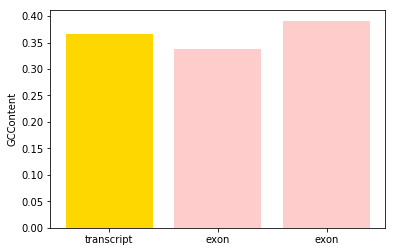

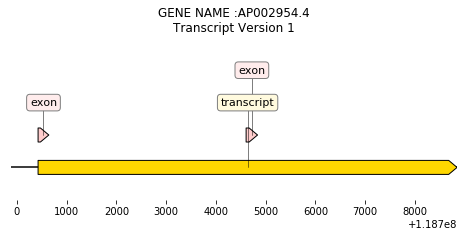

In [587]:
##here we vary the number in accordance with the the gene in names :
GeneFrame(32333)

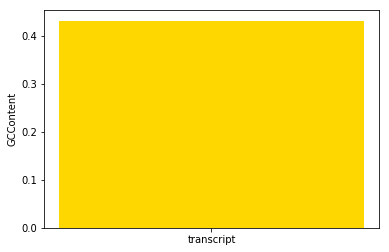

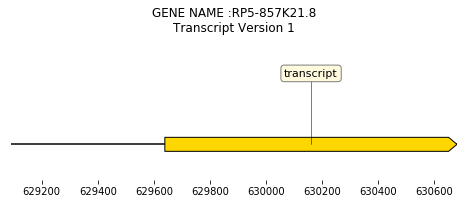

In [588]:
GeneFrame(33)

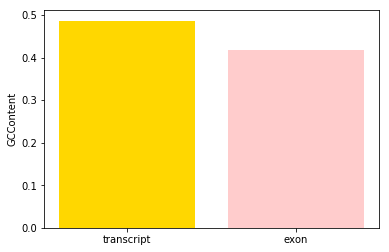

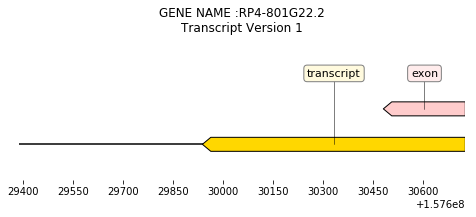

In [589]:
GeneFrame(3343)

2is the string length , too small to process


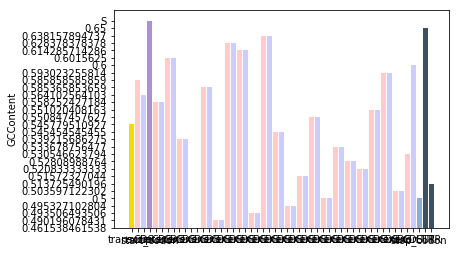

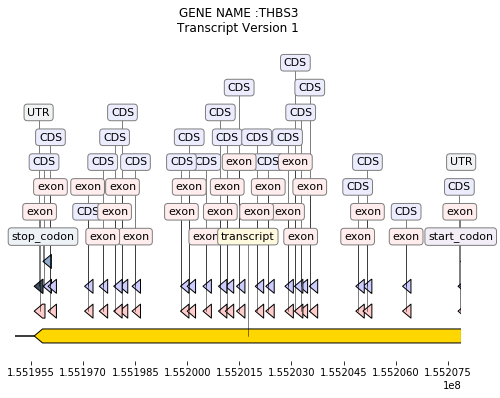

2is the string length , too small to process


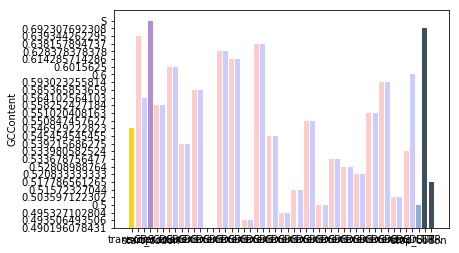

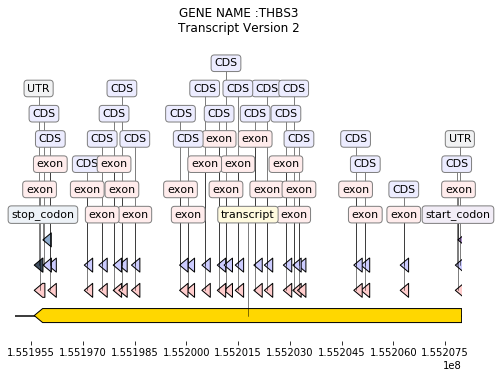

2is the string length , too small to process


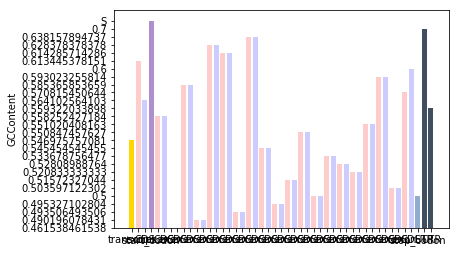

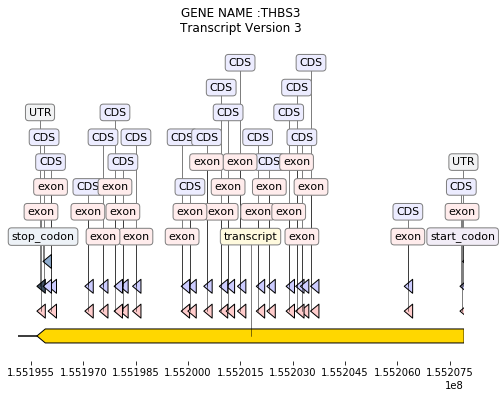

2is the string length , too small to process


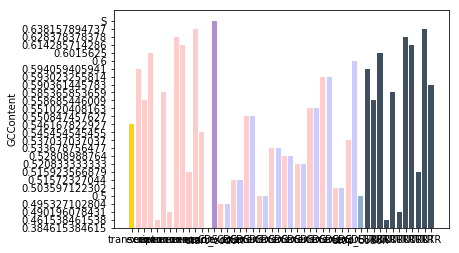

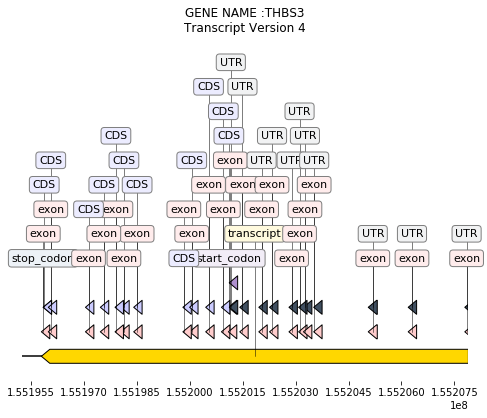

In [590]:
GeneFrame(3236)